In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Or second approach 
#  Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
#sum(city_data_df["type"]=="Urban")
#sum(city_data_df["type"]=="Rural")
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Merge the dataframes ride_data_df and city_data_df
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"]) 


In [13]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# create dataframes for each city type (rural, suburban, urban)
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df["type"]=='Rural']
#urban_cities_df.head()
#suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
# Get the ride counts by type of city
urban_ride_count=urban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count=rural_cities_df.groupby("city").count()["ride_id"]
#urban_ride_count.head()
#suburban_ride_count.head()
rural_ride_count.head()

#

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [16]:
# Now get the average fare for each city type
urban_avg_fare=urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare=rural_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head()
#suburban_avg_fare.head()
#rural_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [17]:
# Now get the average number of drivers for each city type
urban_driver_count=urban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()
#suburban_driver_count.head()
#rural_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

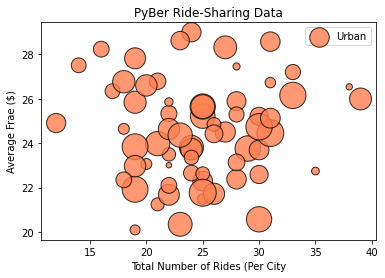

In [22]:
# Urban cities bubble chart of fare vs ride counts
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s=10*urban_driver_count, 
    c='coral', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label="Urban" 
    )
plt.title('PyBer Ride-Sharing Data')
plt.ylabel('Average Frae ($)')
plt.xlabel('Total Number of Rides (Per City')
plt.legend()


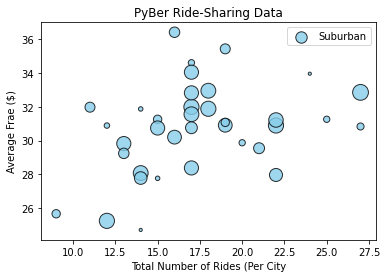

In [24]:
# Suburban cities bubble chart of fare vs ride counts
plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count, 
    c='skyblue', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label="Suburban" 
    )
plt.title('PyBer Ride-Sharing Data')
plt.ylabel('Average Frae ($)')
plt.xlabel('Total Number of Rides (Per City')
plt.legend()

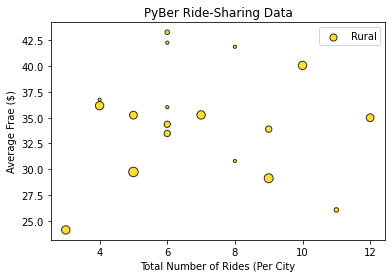

In [23]:
# Rural cities bubble chart of fare vs ride counts
plt.scatter(rural_ride_count,
    rural_avg_fare,
    s=10*rural_driver_count, 
    c='gold', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label="Rural" 
    )
plt.title('PyBer Ride-Sharing Data')
plt.ylabel('Average Frae ($)')
plt.xlabel('Total Number of Rides (Per City')
plt.legend()

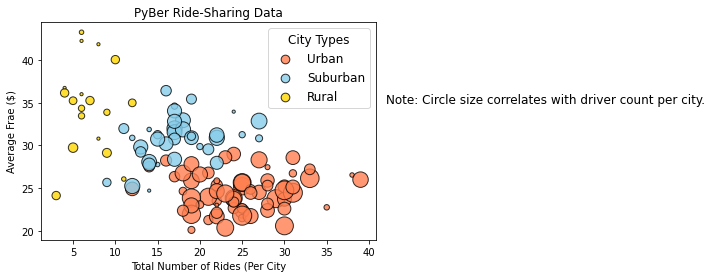

In [30]:
# Urban cities bubble chart of fare vs ride counts
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s=5*urban_driver_count, 
    c='coral', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label="Urban" 
    )
plt.title('PyBer Ride-Sharing Data')
plt.ylabel('Average Frae ($)')
plt.xlabel('Total Number of Rides (Per City')
plt.legend()

# Suburban cities bubble chart of fare vs ride counts
plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count, 
    c='skyblue', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label="Suburban" 
    )
plt.title('PyBer Ride-Sharing Data')
plt.ylabel('Average Frae ($)')
plt.xlabel('Total Number of Rides (Per City')
plt.legend()

# Rural cities bubble chart of fare vs ride counts
plt.scatter(rural_ride_count,
    rural_avg_fare,
    s=10*rural_driver_count, 
    c='gold', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label="Rural" 
    )
plt.title('PyBer Ride-Sharing Data')
plt.ylabel('Average Frae ($)')
plt.xlabel('Total Number of Rides (Per City')
plt.legend()

# format legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")